In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("V:\\Data Science\\Projects\\Airline Fare Prediction\\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [5]:
df.tail(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2.0,No info,11753


In [6]:
df['Total_Stops'].dtype

dtype('float64')

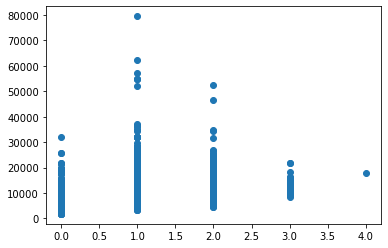

In [7]:
plt.scatter(df['Total_Stops'],df["Price"])


In [8]:
np.mean(df['Total_Stops'])

0.8241902265493354

In [9]:
np.mean(df['Price'])

9087.064120565385

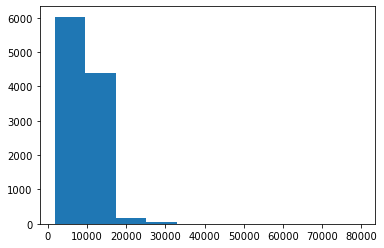

In [10]:
plt.hist(df['Price']);

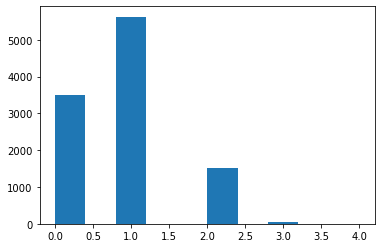

In [11]:
plt.hist(df['Total_Stops']);

In [12]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [13]:
y=df['Total_Stops'].values
X=df['Price'].values


In [14]:
df['Total_Stops'].fillna(df['Total_Stops'].mean(),inplace=True)

In [15]:
df['Total_Stops'].astype(int)

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10683, dtype: int32

In [16]:
m=df.shape[0]

In [17]:
Xmean=np.mean(X)
ymean=np.mean(y)

In [18]:
num=0
den=0
for i in range(m):
    num+=(X[i]-Xmean)*(y[i]-ymean)
    den+=(X[i]-Xmean)**2
    slope=num/den
    c=ymean-slope*Xmean

In [19]:
slope,c


(8.842233264122336e-05, 0.020690820148576927)

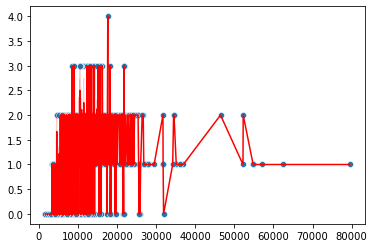

In [20]:
sns.scatterplot(X,y);
sns.lineplot(X,y,color='r')
plt.show()

In [21]:
ypred=slope*X+c

In [22]:
ypred

array([0.36527265, 0.69818273, 1.24816964, ..., 0.65989586, 1.13905648,
       1.0599185 ])

In [25]:
##R2 value

In [29]:
for i in range(m):
  n += (ypred[i]-ymean)**2
  d += (y[i]-ymean)**2
r2 = n/d
r2

0.3646873295792929